# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


# Task 1: Develop CNN and Resnet50

In [ ]:
# Directories
rust_dir = "/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/Corrosion/rust"
no_rust_dir = "/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/Corrosion/no rust"


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Parameters
img_size_cnn = (128, 128)  # For CNN
img_size_resnet = (224, 224)  # For ResNet50
batch_size = 32

# Image Data Generator with Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# Image Data Generator for validation and test sets (no augmentation, just rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Create train and validation generators for CNN (128x128)
train_generator_cnn = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/Corrosion",
    target_size=img_size_cnn,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Set for training
)

validation_generator_cnn = validation_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/Corrosion",
    target_size=img_size_cnn,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Set for validation
)

# Create train and validation generators for ResNet50 (224x224)
train_generator_resnet = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/Corrosion",
    target_size=img_size_resnet,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Set for training
)

validation_generator_resnet = validation_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/Corrosion",
    target_size=img_size_resnet,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Set for validation
)

# Print class indices for reference
print("Class indices:", train_generator_cnn.class_indices)


Found 616 images belonging to 2 classes.
Found 154 images belonging to 2 classes.
Found 616 images belonging to 2 classes.
Found 154 images belonging to 2 classes.
Class indices: {'no rust': 0, 'rust': 1}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Simple CNN Model Architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(
    train_generator_cnn,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator_cnn
)

# Save the model
# cnn_model.save("/content/drive/MyDrive/SWINBURNE/AI for engineer/Week 5/cnn_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4903 - loss: 1.5320 - val_accuracy: 0.6883 - val_loss: 0.6239
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6203 - loss: 0.6505 - val_accuracy: 0.6753 - val_loss: 0.6546
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7257 - loss: 0.6041 - val_accuracy: 0.6558 - val_loss: 0.7495
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7034 - loss: 0.5674 - val_accuracy: 0.5325 - val_loss: 1.1075
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7119 - loss: 0.5825 - val_accuracy: 0.7338 - val_loss: 0.5266
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8178 - loss: 0.4555 - val_accuracy: 0.7727 - val_loss: 0.5027
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8006 - loss: 0.4167 - val_accuracy: 0.7273 - val_loss: 0.5154
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8048 - loss: 0.4539 - val_accuracy: 0.7792 - val_loss: 0.4812
Epo

In [ ]:
# Load and preprocess images
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

rust_images = [os.path.join(rust_dir, img) for img in os.listdir(rust_dir)]
no_rust_images = [os.path.join(no_rust_dir, img) for img in os.listdir(no_rust_dir)]


In [ ]:
# Randomly split into training and test set
random.seed(42)
rust_test_images = random.sample(rust_images, 10)
no_rust_test_images = random.sample(no_rust_images, 10)

rust_train_images = [img for img in rust_images if img not in rust_test_images]
no_rust_train_images = [img for img in no_rust_images if img not in no_rust_test_images]

# Load training images
train_images = [load_and_preprocess_image(img) for img in rust_train_images + no_rust_train_images]
train_labels = [1] * len(rust_train_images) + [0] * len(no_rust_train_images)

# Load test images
test_images = [load_and_preprocess_image(img) for img in rust_test_images + no_rust_test_images]
test_labels = [1] * len(rust_test_images) + [0] * len(no_rust_test_images)

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(750, 128, 128, 3)
(20, 128, 128, 3)
(750,)
(20,)


## Simple CNN

In [ ]:
# Simple CNN Model
simple_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

simple_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the simple CNN model
history = simple_cnn.fit(train_images, train_labels, epochs=10, batch_size=32)

# Save the model
# simple_cnn.save('simple_cnn_model.h5')


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 771ms/step - accuracy: 0.9389 - loss: 0.1821
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 785ms/step - accuracy: 0.9435 - loss: 0.1469
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 781ms/step - accuracy: 0.9644 - loss: 0.1165
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 774ms/step - accuracy: 0.9618 - loss: 0.1121
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 769ms/step - accuracy: 0.9615 - loss: 0.1350
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 863ms/step - accuracy: 0.9753 - loss: 0.0736
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 770ms/step - accuracy: 0.9877 - loss: 0.0526
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 770ms/step - accuracy: 0.9899 - loss: 0.0453
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 762ms/step - accuracy: 0.9314 - loss: 0.2027
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 819ms/step - accuracy: 0.9724 - loss: 0.0905


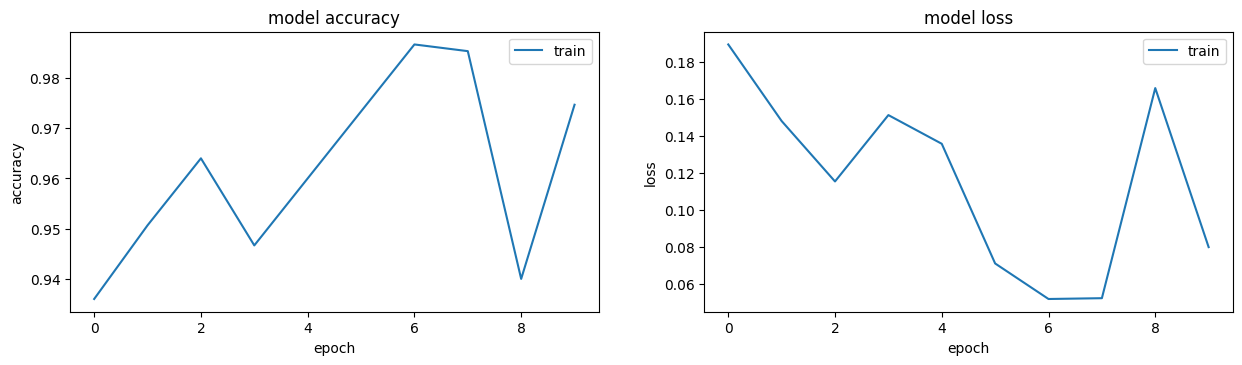

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
# Evaluate on test set
simple_cnn_accuracy = simple_cnn.evaluate(test_images, test_labels, verbose=0)[1]
print(f"Simple CNN Test Accuracy: {simple_cnn_accuracy}")


Simple CNN Test Accuracy: 0.800000011920929


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Confusion Matrix:
[[10  0]
 [ 6  4]]


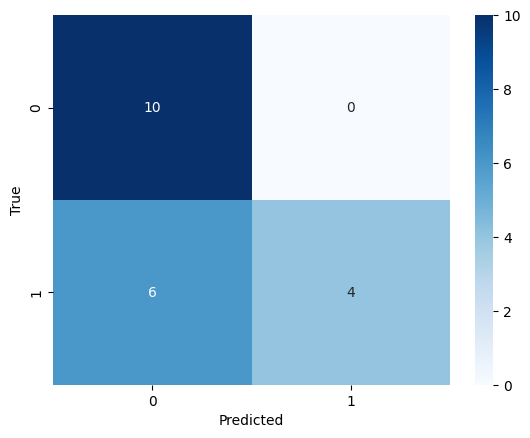

In [ ]:
# Run inference on test set
predictions = simple_cnn.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int)

# Get confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Visualize using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save each image from test set to directory
from PIL import Image
output_directory = "/content/drive/MyDrive/SimpleCNN_output"
os.makedirs(output_directory, exist_ok=True)
for i, img in enumerate(test_images):
    image = Image.fromarray((img * 255).astype(np.uint8))
    file_name = f"image_{i}_predicted_{predicted_labels[i]}_truth_{test_labels[i]}.png"
    image_path = os.path.join(output_directory, file_name)
    image.save(image_path)


## ResNet50

In [ ]:
# ResNet50 Model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Adding custom layers on top of ResNet50
x = resnet_base.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

resnet_model = Model(inputs=resnet_base.input, outputs=predictions)

# Freeze the layers of ResNet50 base model
for layer in resnet_base.layers:
    layer.trainable = False

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
resnet_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 27,782,273 (105.98 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
fit_history = resnet_model.fit(train_generator, epochs=10, batch_size=32)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5406 - loss: 1.0134
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5354 - loss: 0.6901
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.4944 - loss: 0.7025
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5509 - loss: 0.6895
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5164 - loss: 0.7109
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5646 - loss: 0.6864
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5812 - loss: 0.6694
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5640 - loss: 0.6770
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5530 - loss: 0.6767
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5877 - loss: 0.6889


KeyError: 'val_accuracy'

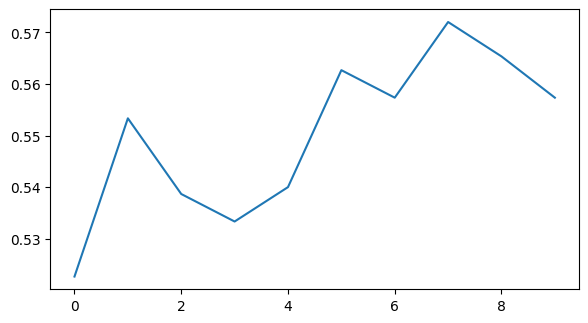

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
# Evaluate on test set
resnet_accuracy = resnet_model.evaluate(test_images, test_labels, verbose=0)[1]
print(f"ResNet50 Test Accuracy: {resnet_accuracy}")


ResNet50 Test Accuracy: 0.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
Confusion Matrix:
[[10  0]
 [10  0]]


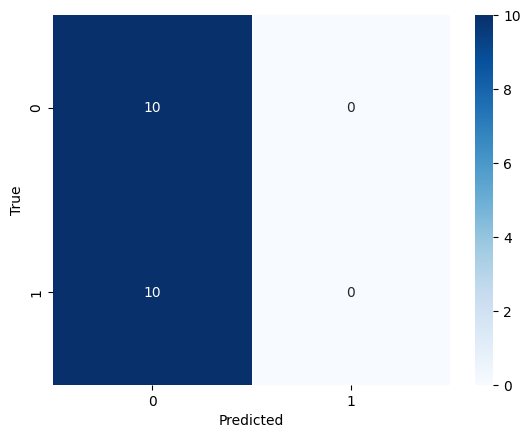

In [ ]:
resnet_model.save('resnet50_model.h5')

# Run inference on test set
predictions = resnet_model.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int)

# Get confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Visualize using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save each image from test set to directory
from PIL import Image
output_directory = "/content/drive/MyDrive/ResNet50_output"
os.makedirs(output_directory, exist_ok=True)
for i, img in enumerate(test_images):
    image = Image.fromarray((img * 255).astype(np.uint8))
    file_name = f"image_{i}_predicted_{predicted_labels[i]}_truth_{test_labels[i]}.png"
    image_path = os.path.join(output_directory, file_name)
    image.save(image_path)

# Task 2: Develop Mask RCNN for detecting log

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-8gqvderc
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-8gqvderc
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5b72c27ae39f99db75d43f18fd1312e1ea934e60
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install labelme2coco

In [ ]:
import cv2
import torch
import json
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode
from detectron2.engine import DefaultTrainer
from detectron2.checkpoint import DetectionCheckpointer
from labelme2coco import convert

# Define global variables
ROOT_DIR = os.path.abspath(".")
LOG_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/Colab Notebooks/Week 5/log-labelled")
COCO_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/Colab Notebooks/Week 5/coco-labelled")
MODEL_OUTPUT_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/Colab Notebooks/Week 5/model-output")
IMAGE_OUTPUT_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/Colab Notebooks/Week 5/image-output")
TRAIN = True

# Create MODEL_OUTPUT_DIR directory
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# Create IMAGE_OUTPUT_DIR directory
os.makedirs(IMAGE_OUTPUT_DIR, exist_ok=True)

# Mask R-CNN model configuration for trainning
def setup_cfg(MODEL_OUTPUT_DIR):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.DATASETS.TRAIN = ("log_train",)
    cfg.DATASETS.TEST = ("log_val",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 100
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
    cfg.MODEL_OUTPUT_DIR = MODEL_OUTPUT_DIR
    cfg.MODEL.DEVICE = "cpu"  # Force cpu/gpu usage
    return cfg

In [ ]:
# Step 1: Randomly take out 10 images for testing
def select_test_images(log_dir, num_test=10):
    all_images = [f for f in os.listdir(log_dir) if f.endswith('.png')]
    test_images = random.sample(all_images, num_test)
    return test_images

# Step 2: Convert labelme annotations to COCO annotation for the purpose of training mask RCNN
def labelme_to_coco(log_dir, coco_dir):
    convert(
        labelme_folder=log_dir,
        export_dir=coco_dir,
        train_split_rate=0.9,  # 90% for training, 10% for validation
        category_id_start=1  # Start category IDs at 1 (0 is typically reserved for background)
    )

# Load the dataset in Detectron2 format
def get_log_dicts(img_dir, json_file):
    json_dir = os.path.join(img_dir, json_file)
    with open(json_dir) as f:
        coco_data = json.load(f)

    dataset_dicts = []
    for image in coco_data['images']:
        record = {}

        filename = os.path.join(img_dir, image['file_name'])

        record["file_name"] = filename
        record["image_id"] = image['id']
        record["height"] = image['height']
        record["width"] = image['width']

        annos = [anno for anno in coco_data['annotations'] if anno['image_id'] == image['id']]
        objs = []
        for anno in annos:
            obj = {
                "bbox": anno['bbox'],
                "bbox_mode": BoxMode.XYWH_ABS,
                "segmentation": anno['segmentation'],
                "category_id": anno['category_id'] - 1,  # Subtract 1 because Detectron2 uses 0-indexed categories
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

# Register the dataset
def register_datasets():
    for d in ["train", "val"]:
        DatasetCatalog.register("log_" + d, lambda d=d: get_log_dicts(COCO_DIR, f"{d}.json"))
        MetadataCatalog.get("log_" + d).set(thing_classes=["log"])



In [ ]:
def detect_and_visualise(predictor, image_path, output_path):
    im = cv2.imread(image_path)
    outputs = predictor(im)

    instances = outputs["instances"].to("cpu")
    boxes = instances.pred_boxes.tensor.numpy()
    scores = instances.scores.numpy()

    for box, score in zip(boxes, scores):
        x1, y1, x2, y2 = box.astype(int)
        color = (0, 255, 0)  # Green color for all boxes
        cv2.rectangle(im, (x1, y1), (x2, y2), color, 2)

        # Display score
        score_text = f"log: {score:.2f}"
        cv2.putText(im, score_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cv2.imwrite(output_path, im)
    return outputs

# Step 4: Count number of detected logs in each output image
def count_logs(outputs):
    return len(outputs["instances"])

In [ ]:
# Initialize and configure the model
cfg = setup_cfg(MODEL_OUTPUT_DIR)

if TRAIN:
    # Transform labelme annotations into COCO format for better compatibility
    labelme_to_coco(LOG_DIR, COCO_DIR)

    # Register custom datasets with the Detectron2 framework
    # This step is crucial for first-time setup
    register_datasets()

    # Instantiate the trainer with our configuration
    trainer = DefaultTrainer(cfg)
    # Begin training, starting fresh (not resuming from a checkpoint)
    trainer.resume_or_load(resume=False)
    # Launch the training process
    trainer.train()

    # After training completes, save the final model state
    checkpointer = DetectionCheckpointer(trainer.model, save_dir=cfg.MODEL_OUTPUT_DIR)
    checkpointer.save("model_final")

# Prepare for inference using the trained model
# Update the model configuration to use our newly trained weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.MODEL_OUTPUT_DIR, "model_final.pth")
# Set a confidence threshold for object detection
# Adjust this value to balance precision and recall
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

# Create a predictor object using our updated configuration
predictor = DefaultPredictor(cfg)

# Randomly choose a subset of images for testing
test_images = select_test_images(LOG_DIR, num_test=10)

# Step 4: Count number of detected logs in each output image
for image_name in test_images:
    # Construct full paths for input and output
    image_path = os.path.join(LOG_DIR, image_name)
    output_path = os.path.join(IMAGE_OUTPUT_DIR, f"output_{image_name}")

    # Perform object detection and visualize the results
    outputs = detect_and_visualise(predictor, image_path, output_path)

    # Analyze the detection results by counting log
    log_count = count_logs(outputs)
    print(f"Number of logs detected in {image_name}: {log_count}")

There are 600 listed files in folder log-labelled.


Converting labelme annotations to COCO format: 100%|██████████| 600/600 [01:43<00:00,  5.77it/s]


[09/03 10:05:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 94.2MB/s]                          
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/03 10:06:02 d2.engine.train_loop]: Starting training from iteration 0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/03 10:20:37 d2.utils.events]:  eta: 0:57:24  iter: 19  total_loss: 2.206  loss_cls: 0.6498  loss_box_reg: 0.8185  loss_mask: 0.6796  loss_rpn_cls: 0.02785  loss_rpn_loc: 0.02911    time: 43.4569  last_time: 42.6848  data_time: 0.0448  last_data_time: 0.0078   lr: 4.7703e-05  
[09/03 10:35:30 d2.utils.events]:  eta: 0:43:29  iter: 39  total_loss: 1.874  loss_cls: 0.4703  loss_box_reg: 0.8479  loss_mask: 0.5149  loss_rpn_cls: 0.016  loss_rpn_loc: 0.02635    time: 44.0654  last_time: 45.1999  data_time: 0.0103  last_data_time: 0.0089   lr: 9.7653e-05  
[09/03 10:50:36 d2.utils.events]:  eta: 0:29:20  iter: 59  total_loss: 1.524  loss_cls: 0.3311  loss_box_reg: 0.7975  loss_mask: 0.3149  loss_rpn_cls: 0.007257  loss_rpn_loc: 0.02334    time: 44.5030  last_time: 45.4896  data_time: 0.0139  last_data_time: 0.0168   lr: 0.0001476  
[09/03 11:05:19 d2.utils.events]:  eta: 0:14:40  iter: 79  total_loss: 1.273  loss_cls: 0.2375  loss_box_reg: 0.7258  loss_mask: 0.2558  loss_rpn_cls: 0.002711

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

Number of logs detected in 00562-ZED-Left-1622132336.png: 9
Number of logs detected in 00374-ZED-Left-1622133049.png: 11
Number of logs detected in 00532-ZED-Left-1622130633.png: 10
Number of logs detected in 00436-ZED-Left-1622130709.png: 9
Number of logs detected in 00412-ZED-Left-1622129423.png: 10
Number of logs detected in 00453-ZED-Right-1622131592.png: 10
Number of logs detected in 00405-ZED-Left-1622129097.png: 9
Number of logs detected in 00544-ZED-Right-1622131261.png: 10
Number of logs detected in 00346-ZED-Right-1622131588.png: 11
Number of logs detected in 00450-ZED-Right-1622131421.png: 8


In [ ]:
import shutil

# Define the source and destination paths
source_path = "/content/output"
destination_path = "/content/drive/MyDrive/Colab Notebooks/Week 5"

# Move the folder
shutil.move(source_path, destination_path)

print("Folder moved successfully.")


Folder moved successfully.
